In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import (CountVectorizer, 
                                             TfidfVectorizer)

In this notebook, we conduct exploratory data analysis on the post data which we have

In [2]:
# read in data
ow_cod_df = pd.read_csv('data/ow_cod_df_clean.csv')

### Posts by Date

In [3]:
# add date column
ow_cod_df['date'] = pd.to_datetime(ow_cod_df['utc_datetime_str']).dt.strftime('%m/%d')

In [4]:
def create_time_plot(subreddit: int, df):
    # create dataframe of post count per day
    subreddit_dates = df.loc[df['subreddit_ow']==subreddit].groupby('date')['date'].count().to_frame()
    subreddit_dates.columns = ['post_count']
    
    # create seaborn line plot
    sns.set(rc={'figure.figsize':(7, 7)})
    ax = sns.lineplot(data=subreddit_dates, x=subreddit_dates.index, y="post_count", color='steelblue')
    ax.set(xlabel='date (2022)', ylabel=f'posts for game {subreddit}', title=f'post count per day for game {subreddit}')
    # set weekly tick marks
    plt.xticks(['11/15', '11/22', '11/29', '12/06', '12/13']);

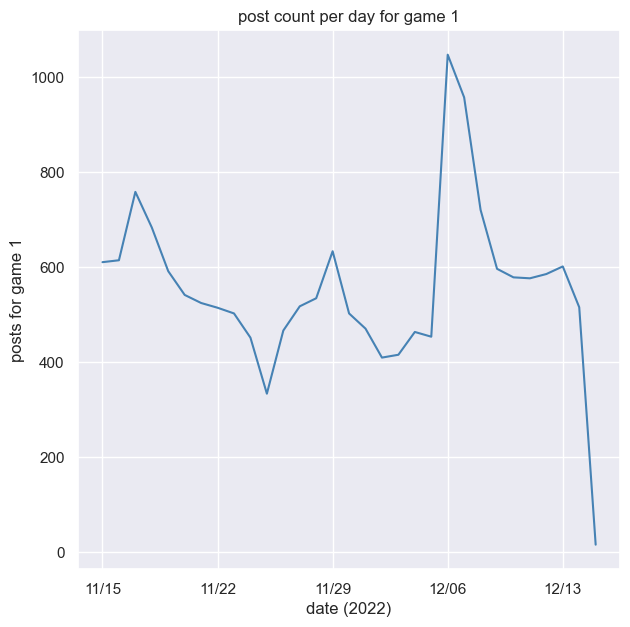

In [5]:
# look at Overwatch 2
create_time_plot(subreddit=1, df=ow_cod_df)

* There was a midseason patch released on 11/17/2022. The spike on 11/17 can be explained by this patch release. Notably, this patch released a character named Mei into the game (who was a character from the original *Overwatch*)
* Overwatch 2 Season 2 released globally on 12/06/2022 at 7pm GMT. The spike on 12/06 is explained by the new season release.
* The data was pulled on 12/14, afternoon PST which explains the drop in posts for 12/14 (the day was not over)

sources:

* https://www.pcgamesn.com/overwatch-2/season-2
* https://gamerant.com/overwatch-2-patch-new-release-date/

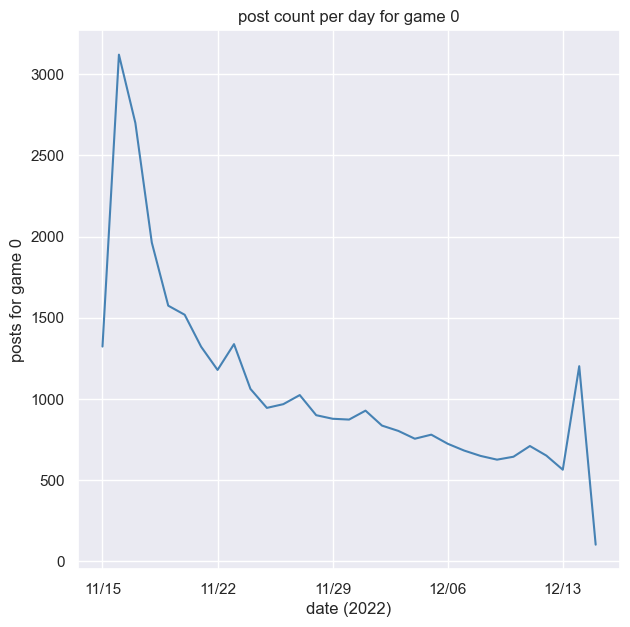

In [6]:
# look at Overwatch 2
create_time_plot(subreddit=0, df=ow_cod_df)

* There were two large game updates, part 1 on 11/16/2022 and part 2 on 11/17/2022. Many people were upset that the update was so large and there were reports of slow download speeds. This explains the post spike seen around 11/17
* There was a "Season 01 Reloaded" release on 12/14/2022 which explains the spike in post counts on 12/14
* The data was pulled on 12/14, afternoon PST which explains the drop in posts for 12/14 (the day was not over)

Sources:
* https://piunikaweb.com/2022/11/18/cod-modern-warfare-2-players-furious-over-50gb-update-on-xbox/
* https://www.callofduty.com/blog/2022/12/call-of-duty---modern-warfare-ii-and-warzone--2-0-season-01-relo#dec14

In [7]:
# looking at common bigrams
# this was fed into the model but the performance was not as great - regardless, it was used to filter out words in the data cleaning process
cv_bigrams = CountVectorizer(ngram_range=(2,2), stop_words='english', max_features=10000)
bigrams = cv_bigrams.fit_transform(ow_cod_df['title_selftext'])
#bigrams.todense()
bigrams = pd.DataFrame(bigrams.todense(), columns=cv_bigrams.get_feature_names_out())

bigrams.sum().sort_values(ascending = False).head(40)

battle pass        2009
feel like          1191
dont kn            1062
play game           848
filler filler       797
feels like          681
does kn             659
im sure             542
im just             536
ive tried           519
va edition          518
dont want           503
enemy team          502
game just           499
ive seen            490
shoot house         488
game mode           485
aim assist          446
blah blah           446
ive played          435
having issue        425
want play           418
kn fix              415
playing game        409
just want           407
im playing          387
dont think          377
im getting          342
double xp           342
like im             337
quick play          327
looks like          324
dont understand     324
calling card        321
ive playing         318
voice chat          313
game im             313
ground war          310
im trying           308
just got            308
dtype: int64